In [1]:
import torch
import torchvision
import torchvision.transforms as transforms 

# list of transforms you can perform on pytorch 
dir(transforms)

#### transforms.compose object allows you to specify a series of transformation in a sequence 

In [3]:
# resize image to 256X256 then convert them to tensors
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

#### we apply this serie of transformation to CIFAR data set 

In [4]:

dataset = torchvision.datasets.CIFAR10(root='./Data/Train', download = True, transform = transform )

Extracting ./Data/Train\cifar-10-python.tar.gz to ./Data/Train


In [6]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./Data/Train
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

#### load tha dataset in batches 

In [11]:
dataloader = torch.utils.data.DataLoader(dataset,
                                        batch_size=16,
                                        shuffle=True,
                                        num_workers=2)

In [13]:
# iter function to load batches
image_batch, labels_batch = iter(dataloader).next()

In [14]:
image_batch.shape

torch.Size([16, 3, 256, 256])

one batch loads in 16 images all of them multichannel 256X256

In [15]:
labels_batch.shape

torch.Size([16])

In [17]:
labels_batch

tensor([8, 0, 6, 2, 1, 9, 0, 1, 0, 8, 3, 5, 3, 8, 9, 8])

each image is associated with a label there are 10 categories of images represented by numeric values  (from 0 to 9)

In [18]:
img = torchvision.utils.make_grid(image_batch)

In [19]:
img.shape

torch.Size([3, 518, 2066])

we see above the channel (3) is in first dimension

In [29]:
# moving the channel to last dimesion so the images get in format tha mtplotlib can display
import numpy as np
import matplotlib.pyplot as plt

In [24]:
img = np.transpose(img, (1,2,0))

In [25]:
img.shape

torch.Size([518, 2066, 3])

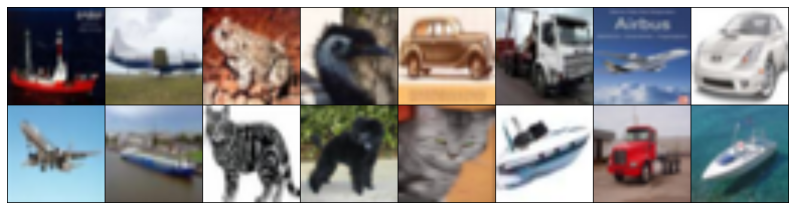

In [36]:
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.axis('off')
plt.show()

## Normalizing the dataset

In [37]:
# mean and std for the entire data set 
data_mean =[]
data_std = []

In [38]:
for i, data in enumerate(dataloader,0):
    #extract images at index 0
    numpy_image = data[0].numpy()
   
    # mean and std separatly for every channel 
    batch_mean = np.mean(numpy_image, axis =(0, 2, 3))
    batch_std = np.std(numpy_image, axis =(0, 2, 3))
    
    #apped to the list
    data_mean.append(batch_mean)
    data_std.append(batch_std)

In [39]:
data_mean =np.array(data_mean) 
data_std = np.array(data_std)

In [40]:
data_mean.shape, data_std.shape

((3125, 3), (3125, 3))

In [41]:
# average of mean and std acros each batch

data_mean = data_mean.mean(axis =0)
data_std  = data_std.mean(axis=0)

In [42]:
print(data_mean)
print(data_std)

[0.49159107 0.48234534 0.44671923]
[0.23831216 0.23496228 0.2527911 ]


In [45]:
#applying transforms on the dataset 
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(data_mean,
                         data_std)
])

In [46]:
# load the CIFAR data again with applying transforms cpecified above
trainset = torchvision.datasets.CIFAR10(root='./Data/trainset', download = True, transform = transform)

Extracting ./Data/trainset\cifar-10-python.tar.gz to ./Data/trainset


In [48]:
# new data loader 
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 16, shuffle = True, num_workers =2)

In [49]:
#acess one batch of the data 
images_batch, labels_batch = iter(trainloader).next()

In [50]:
images_batch.shape

torch.Size([16, 3, 224, 224])

In [51]:
# make a grid of our images
img = torchvision.utils.make_grid(images_batch)
img.shape

torch.Size([3, 454, 1810])

In [52]:
# switch the dimension set the number of channels to be 3rd
img = np.transpose(img, (1,2,0))
img.shape

torch.Size([454, 1810, 3])

In [53]:
#scale the pixel values to be in range 0 to 1
m, M = img.min(), img.max()
m, M

(tensor(-1.9147), tensor(2.2031))

In [54]:
# scale the normalized image 
img = (1/(abs(m) * M))*img+0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


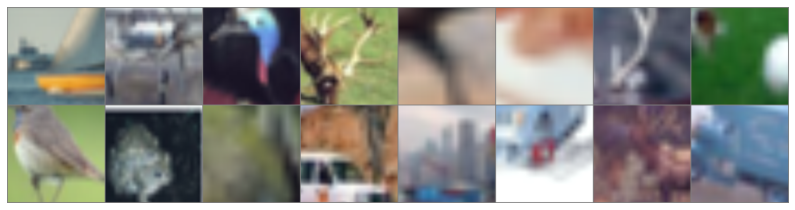

In [56]:
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.axis('off')
plt.show()